In [1]:
#Importing needed modules .
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import Model , layers

In [2]:
#Creating instances of generators .
train_gen = ImageDataGenerator(rescale=1/255,rotation_range=40
                               ,width_shift_range=0.2
                               ,height_shift_range=0.2
                               ,shear_range=0.2
                               ,horizontal_flip=True
                               ,zoom_range=0.2)
valid_gen = ImageDataGenerator(rescale=1/255)

In [4]:
#Generating our photos .
ready_train = train_gen.flow_from_directory("D:\\datasets\\Horse_or_human\\horse-or-human\\horse-or-human\\train"
                                            ,target_size=(150,150)
                                            ,class_mode='binary'
                                           ,batch_size=10)
ready_valid = valid_gen.flow_from_directory("D:\\datasets\\Horse_or_human\\horse-or-human\\horse-or-human\\validation"
                                           ,target_size=(150,150)
                                           ,class_mode='binary'
                                           ,batch_size=5)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [5]:
#Create a model using Inceptipn pre trained model .
def Create_model()->None :
    '''function docstring'''
    pre_trained_model = InceptionV3(include_top=False,input_shape=(150,150,3))
    for layer in pre_trained_model.layers :
        layer.trainable = False
    last_layer = pre_trained_model.get_layer('mixed7')
    last_out = last_layer.output
    x = layers.Flatten()(last_out)
    x = layers.Dense(512,activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(1,activation='sigmoid')(x)
    model = Model(pre_trained_model.input,x)
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [7]:
#model training
history = Create_model().fit(ready_train,epochs=5,validation_data= ready_valid)

Epoch 1/5
103/103 [==============================] - 29s 259ms/step - loss: 0.4957 - accuracy: 0.9387 - val_loss: 0.0892 - val_accuracy: 0.9766
Epoch 2/5
103/103 [==============================] - 27s 260ms/step - loss: 0.0473 - accuracy: 0.9834 - val_loss: 0.0113 - val_accuracy: 0.9961
Epoch 3/5
103/103 [==============================] - 27s 260ms/step - loss: 0.0739 - accuracy: 0.9825 - val_loss: 8.3424e-05 - val_accuracy: 1.0000
Epoch 4/5
103/103 [==============================] - 27s 261ms/step - loss: 0.0515 - accuracy: 0.9873 - val_loss: 0.0435 - val_accuracy: 0.9922
Epoch 5/5
103/103 [==============================] - 28s 268ms/step - loss: 0.0627 - accuracy: 0.9873 - val_loss: 0.0202 - val_accuracy: 0.9961


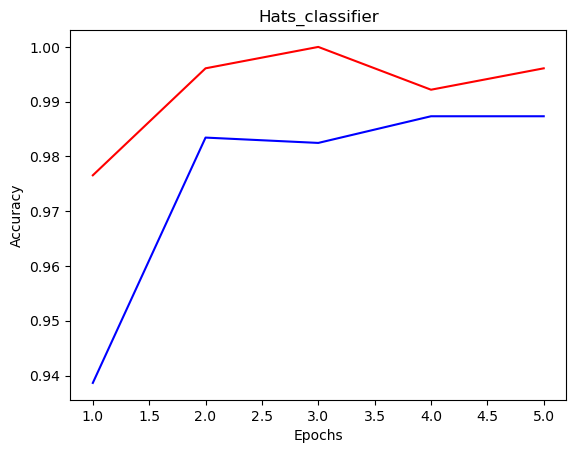

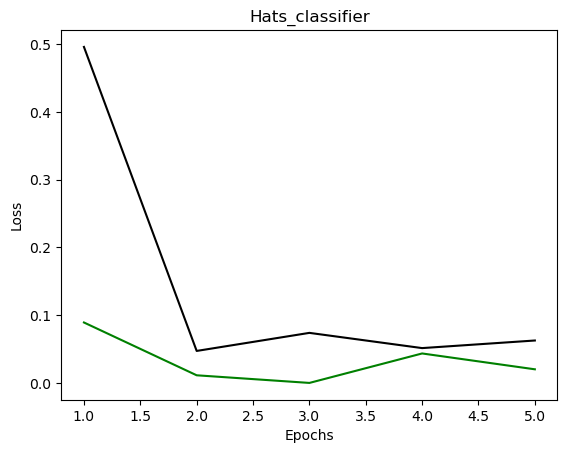

In [9]:
#Visualize models performance
import matplotlib.pyplot as plt
epoch = range(1,6)
results = history.history
plt.plot(epoch,results['accuracy'],'blue')
plt.plot(epoch,results['val_accuracy'],'red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Hats_classifier')
plt.show()
plt.plot(epoch,results['loss'],'black')
plt.plot(epoch,results['val_loss'],'green')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Hats_classifier')
plt.show()